In [1]:
include("MC.jl");

In [30]:
include("viz.jl");

In [3]:
ENV["COLUMNS"] = 200
const N = 30;

In [4]:
city = "Athens"
tit = city*" 2020";

In [5]:
fn_city = "irradiation_Athens.nc"
fn_city_w  = "irradiation_Athens_W.nc"
fn_2020 = "irradiation2020_Athens.nc"
fn_2020_w  = "irradiation2020_Athens_W.nc";

In [6]:
test = getCMF0(fn_city; raw=1)[2]
test_neib_w = getCMF0(fn_city_w; raw=1)[2]

test2020 = getCMF1(fn_2020)
test2020_neib_w = getCMF1(fn_2020_w);

In [7]:
df01 = getDFtm(fn_city)
df02 = getDFtm(fn_2020);

In [8]:
df1_train = df01[1:523007, :]
df1_test = df01[523008:end, :]
df2_train = calCMF(df1_train)
data_train = df2_train.real

data_train_cls, binStarts, binMean = getBins(data_train, N);

In [9]:
ticks = rd.(binMean, 2)
xti = (binMean[[1:2:15; 25; 30]], ticks[[1:2:15; 25; 30]]);

In [9]:
mn = mean(data_train)
sd = std(data_train)
@show rd.([mn, sd], 3);

rd.([mn, sd], 3) = [0.787, 0.245]


In [32]:
data_train

266895-element Vector{Float64}:
 0.5690234774341244
 0.917575674893412
 0.9978020506505431
 0.9800409565810814
 0.9580544044154179
 0.9384730289942355
 0.9417100642022326
 0.9470683037073503
 0.9508805031611631
 0.9548020466177872
 0.9583605613990217
 0.9606651202857454
 0.9620133997140792
 ⋮
 0.27731131064551334
 0.2744138229938606
 0.29222942468735436
 0.3145851587806452
 0.3075592668449427
 0.3348811718241044
 0.3767913554275151
 0.4136418693205565
 0.6608367361770681
 0.8375175537843755
 0.9012583855759357
 0.9219376516443967

In [36]:
dt0 = data_train[1:end-1]
dt1 = data_train[2:end]
dif = rd(meanad(dt0, dt1), 3)

0.049

In [37]:
std(dt1 .- dt0)

0.11371566914221054

In [35]:
rmsd(dt0, dt1)

0.1137154561144318

### compute DFs

In [9]:
df21 = getDF(2, 1)

17562×12 DataFrame
   Row │ time                 month  ghi        ghiCS       real      pers      neib      pred      real_cls  dif_pers     dif_neib     dif_pred    
       │ DateTime             Int8   Float64    Float64     Float64   Float64   Float64   Float64   Int64     Float64      Float64      Float64     
───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │ 2019-01-01T06:30:00      1  12.2594     16.9041    0.725234  0.389299  0.657577  0.49599          9  -0.335936    -0.0676571   -0.229244
     2 │ 2019-01-01T06:45:00      1  22.3234     26.5306    0.841421  0.725234  0.475048  0.735315        12  -0.116186    -0.366372    -0.106105
     3 │ 2019-01-01T07:00:00      1  28.2418     36.5499    0.77269   0.841421  0.306035  0.842306        10   0.0687302   -0.466656     0.0696162
     4 │ 2019-01-01T07:15:00      1  14.1422     46.5776    0.303627  0.77269   0.150091  0.737132         3   0.469064    -0.153536     0.433505
     5 │ 2019-01-01T07:30:00      1  10.7818     56.377     0.191245  0.303627  0.119848  0.334387         1   0.112382    -0.0713974    0.143142
     6 │ 2019-01-01T07:45:00      1  20.1599     65.7885    0.306435  0.191245  0.116912  0.267708         3  -0.11519     -0.189523    -0.038727
     7 │ 2019-01-01T08:00:00      1  21.519      74.6941    0.288095  0.306435  0.120289  0.361413         2   0.01834     -0.167806     0.0733181
     8 │ 2019-01-01T08:15:00      1  21.2941     83.0021    0.256549  0.288095  0.118009  0.316244         2   0.031546    -0.13854      0.0596952
     9 │ 2019-01-01T08:30:00      1  20.8127     90.6381    0.229625  0.256549  0.173238  0.310751         1   0.0269244   -0.0563864    0.0811266
    10 │ 2019-01-01T08:45:00      1  21.5253     97.5409    0.22068   0.229625  0.205749  0.241461         1   0.00894446  -0.0149316    0.0207811
    11 │ 2019-01-01T09:00:00      1  19.3418    103.659     0.18659   0.22068   0.251142  0.226633         1   0.03409      0.064552     0.0400429
   ⋮   │          ⋮             ⋮        ⋮          ⋮          ⋮         ⋮         ⋮         ⋮         ⋮           ⋮            ⋮            ⋮
 17553 │ 2019-12-31T13:00:00     12  45.5495     82.7516    0.550436  0.441669  0.875434  0.475439         7  -0.108767     0.324999    -0.0749972
 17554 │ 2019-12-31T13:15:00     12  41.2922     74.0484    0.557637  0.550436  0.827447  0.621859         7  -0.00720136   0.26981      0.0642215
 17555 │ 2019-12-31T13:30:00     12  40.2434     64.7644    0.621381  0.557637  0.836807  0.599816         7  -0.0637438    0.215426    -0.0215646
 17556 │ 2019-12-31T13:45:00     12  38.3918     54.9977    0.698062  0.621381  0.832952  0.599816         9  -0.0766808    0.13489     -0.0982454
 17557 │ 2019-12-31T14:00:00     12  28.3899     44.8759    0.632632  0.698062  0.818384  0.73197          8   0.0654297    0.185752     0.0993383
 17558 │ 2019-12-31T14:15:00     12  20.9367     34.5764    0.605522  0.632632  0.756808  0.665499         7   0.0271105    0.151286     0.0599776
 17559 │ 2019-12-31T14:30:00     12  21.3803     24.3687    0.877365  0.605522  0.69712   0.590716        13  -0.271843    -0.180245    -0.286649
 17560 │ 2019-12-31T14:45:00     12  13.2015     14.7003    0.898045  0.877365  0.645589  0.930679        13  -0.02068     -0.252456     0.0326342
 17561 │ 2019-12-31T15:00:00     12   5.63654     6.36474   0.885588  0.898045  0.683602  0.874131        13   0.0124566   -0.201986    -0.0114574
 17562 │ 2019-12-31T15:15:00     12   0.829603    0.921568  0.900209  0.885588  0.613411  0.874131        13  -0.0146201   -0.286797    -0.0260775
                                                                                                                                  17541 rows omitted

In [10]:
df22 = getDF(2, 2)
df23 = getDF(2, 3)
df24 = getDF(2, 4);

In [11]:
df21_2020 = getDF(2, 1; df_test=df02, d_test=test2020, d_neib=test2020_neib_w)

17598×12 DataFrame
   Row │ time                 month  ghi         ghiCS      real      pers      neib      pred      real_cls  dif_pers     dif_neib     dif_pred    
       │ DateTime             Int8   Float64     Float64    Float64   Float64   Float64   Float64   Int64     Float64      Float64      Float64     
───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │ 2020-01-01T06:30:00      1   13.3307     19.7287   0.675703  0.614652  0.791924  0.611719         8  -0.0610511    0.11622     -0.0639839
     2 │ 2020-01-01T06:45:00      1   16.9255     30.0285   0.563646  0.675703  0.748868  0.676321         7   0.112057     0.185222     0.112675
     3 │ 2020-01-01T07:00:00      1   23.4972     40.4386   0.581057  0.563646  0.667907  0.590716         7  -0.0174108    0.0868501    0.00965896
     4 │ 2020-01-01T07:15:00      1   28.8591     50.6642   0.569616  0.581057  0.611277  0.599816         7   0.0114412    0.0416612    0.0302004
     5 │ 2020-01-01T07:30:00      1   36.6478     60.5389   0.605359  0.569616  0.595809  0.599816         7  -0.035743    -0.00955019  -0.00554262
     6 │ 2020-01-01T07:45:00      1   46.2966     69.9453   0.661898  0.605359  0.623387  0.599816         8  -0.056539    -0.0385112   -0.0620816
     7 │ 2020-01-01T08:00:00      1   54.5623     78.7777   0.692611  0.661898  0.666933  0.676321         9  -0.0307131   -0.0256778   -0.01629
     8 │ 2020-01-01T08:15:00      1   49.9429     86.9628   0.574302  0.692611  0.577002  0.729917         7   0.118309     0.00270003   0.155615
     9 │ 2020-01-01T08:30:00      1   40.0488     94.4736   0.423915  0.574302  0.44894   0.587904         5   0.150387     0.0250249    0.163989
    10 │ 2020-01-01T08:45:00      1   26.9798    101.226    0.266529  0.423915  0.369248  0.487133         2   0.157386     0.102719     0.220604
    11 │ 2020-01-01T09:00:00      1   24.561     107.166    0.229187  0.266529  0.254415  0.360589         1   0.0373426    0.0252287    0.131403
   ⋮   │          ⋮             ⋮        ⋮           ⋮         ⋮         ⋮         ⋮         ⋮         ⋮           ⋮            ⋮            ⋮
 17589 │ 2020-12-31T13:00:00     12   57.5344     78.5747   0.732226  0.812779  0.748618  0.773309         9   0.0805533    0.0163924    0.0410839
 17590 │ 2020-12-31T13:15:00     12   51.4915     70.1663   0.73385   0.732226  0.795773  0.704198         9  -0.00162395   0.0619238   -0.0296518
 17591 │ 2020-12-31T13:30:00     12   48.745      61.1987   0.796504  0.73385   0.783018  0.717158        11  -0.0626544   -0.0134858   -0.079346
 17592 │ 2020-12-31T13:45:00     12   43.3641     51.7822   0.837433  0.796504  0.860952  0.799984        12  -0.0409295    0.0235191   -0.0374493
 17593 │ 2020-12-31T14:00:00     12   37.4514     42.0657   0.890308  0.837433  0.853265  0.846769        13  -0.052875    -0.0370434   -0.0435398
 17594 │ 2020-12-31T14:15:00     12   28.9509     32.2583   0.89747   0.890308  0.888192  0.886411        13  -0.00716159  -0.00927766  -0.0110587
 17595 │ 2020-12-31T14:30:00     12   19.924      22.6647   0.879076  0.89747   0.897924  0.874131        13   0.0183944    0.0188487   -0.00494461
 17596 │ 2020-12-31T14:45:00     12   11.6907     13.738    0.850978  0.879076  0.879543  0.874131        12   0.028098     0.028565     0.0231534
 17597 │ 2020-12-31T15:00:00     12    4.60375     6.15344  0.748158  0.850978  0.851343  0.791858        10   0.10282      0.103185     0.0437
 17598 │ 2020-12-31T15:15:00     12    0.387973    1.00302  0.386804  0.748158  0.764654  0.737132         4   0.361353     0.37785      0.350328
                                                                                                                                  17577 rows omitted

In [12]:
df22_2020 = getDF(2, 2; df_test=df02, d_test=test2020, d_neib=test2020_neib_w)
df23_2020 = getDF(2, 3; df_test=df02, d_test=test2020, d_neib=test2020_neib_w)
df24_2020 = getDF(2, 4; df_test=df02, d_test=test2020, d_neib=test2020_neib_w);

In [13]:
df1t = hybrid(df21, df21_2020, 1)

17598×18 DataFrame
   Row │ time                 month  ghi         ghiCS      real      pers      neib      pred      real_cls  dif_pers     dif_neib     dif_pred     mae_min  hyb_m     rmse_min  hyb_r     dif_hyb_m  ⋯
       │ DateTime             Int8   Float64     Float64    Float64   Float64   Float64   Float64   Int64     Float64      Float64      Float64      Int64    Float64   Int64     Float64   Float64    ⋯
───────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │ 2020-01-01T06:30:00      1   13.3307     19.7287   0.675703  0.614652  0.791924  0.611719         8  -0.0610511    0.11622     -0.0639839         0  0.614652         0  0.614652  -0.0610511 ⋯
     2 │ 2020-01-01T06:45:00      1   16.9255     30.0285   0.563646  0.675703  0.748868  0.676321         7   0.112057     0.185222     0.112675          3  0.676321         3  0.676321   0.112675
     3 │ 2020-01-01T07:00:00      1   23.4972     40.4386   0.581057  0.563646  0.667907  0.590716         7  -0.0174108    0.0868501    0.00965896        3  0.590716         3  0.590716   0.0096589
     4 │ 2020-01-01T07:15:00      1   28.8591     50.6642   0.569616  0.581057  0.611277  0.599816         7   0.0114412    0.0416612    0.0302004         3  0.599816         3  0.599816   0.0302004
     5 │ 2020-01-01T07:30:00      1   36.6478     60.5389   0.605359  0.569616  0.595809  0.599816         7  -0.035743    -0.00955019  -0.00554262        3  0.599816         3  0.599816  -0.0055426 ⋯
     6 │ 2020-01-01T07:45:00      1   46.2966     69.9453   0.661898  0.605359  0.623387  0.599816         8  -0.056539    -0.0385112   -0.0620816         3  0.599816         3  0.599816  -0.0620816
     7 │ 2020-01-01T08:00:00      1   54.5623     78.7777   0.692611  0.661898  0.666933  0.676321         9  -0.0307131   -0.0256778   -0.01629           3  0.676321         3  0.676321  -0.01629
     8 │ 2020-01-01T08:15:00      1   49.9429     86.9628   0.574302  0.692611  0.577002  0.729917         7   0.118309     0.00270003   0.155615          3  0.729917         3  0.729917   0.155615
     9 │ 2020-01-01T08:30:00      1   40.0488     94.4736   0.423915  0.574302  0.44894   0.587904         5   0.150387     0.0250249    0.163989          3  0.587904         3  0.587904   0.163989  ⋯
    10 │ 2020-01-01T08:45:00      1   26.9798    101.226    0.266529  0.423915  0.369248  0.487133         2   0.157386     0.102719     0.220604          1  0.423915         3  0.487133   0.157386
    11 │ 2020-01-01T09:00:00      1   24.561     107.166    0.229187  0.266529  0.254415  0.360589         1   0.0373426    0.0252287    0.131403          1  0.266529         1  0.266529   0.0373426
   ⋮   │          ⋮             ⋮        ⋮           ⋮         ⋮         ⋮         ⋮         ⋮         ⋮           ⋮            ⋮            ⋮          ⋮        ⋮         ⋮         ⋮           ⋮     ⋱
 17589 │ 2020-12-31T13:00:00     12   57.5344     78.5747   0.732226  0.812779  0.748618  0.773309         9   0.0805533    0.0163924    0.0410839         3  0.773309         3  0.773309   0.0410839
 17590 │ 2020-12-31T13:15:00     12   51.4915     70.1663   0.73385   0.732226  0.795773  0.704198         9  -0.00162395   0.0619238   -0.0296518         3  0.704198         3  0.704198  -0.0296518 ⋯
 17591 │ 2020-12-31T13:30:00     12   48.745      61.1987   0.796504  0.73385   0.783018  0.717158        11  -0.0626544   -0.0134858   -0.079346          3  0.717158         3  0.717158  -0.079346
 17592 │ 2020-12-31T13:45:00     12   43.3641     51.7822   0.837433  0.796504  0.860952  0.799984        12  -0.0409295    0.0235191   -0.0374493         3  0.799984         3  0.799984  -0.0374493
 17593 │ 2020-12-31T14:00:00     12   37.4514     42.0657   0.890308  0.837433  0.853265  0.846769        13  -0.052875    -0.0370434   -0.0435398         3  0.846769         3  0.846769  -0

In [14]:
df2t = hybrid(df22, df22_2020, 2)
df3t = hybrid(df23, df23_2020, 3)
df4t = hybrid(df24, df24_2020, 4);

###  Corr

In [18]:
calc_cor(df) = rd.(cor(df.real, df.hyb_r), 4)

calc_cor (generic function with 1 method)

In [19]:
calc_cor(df1t)

0.9176

In [20]:
calc_cor(df2t)

0.8406

In [21]:
calc_cor(df3t)

0.7807

In [22]:
calc_cor(df4t)

0.7574

### old

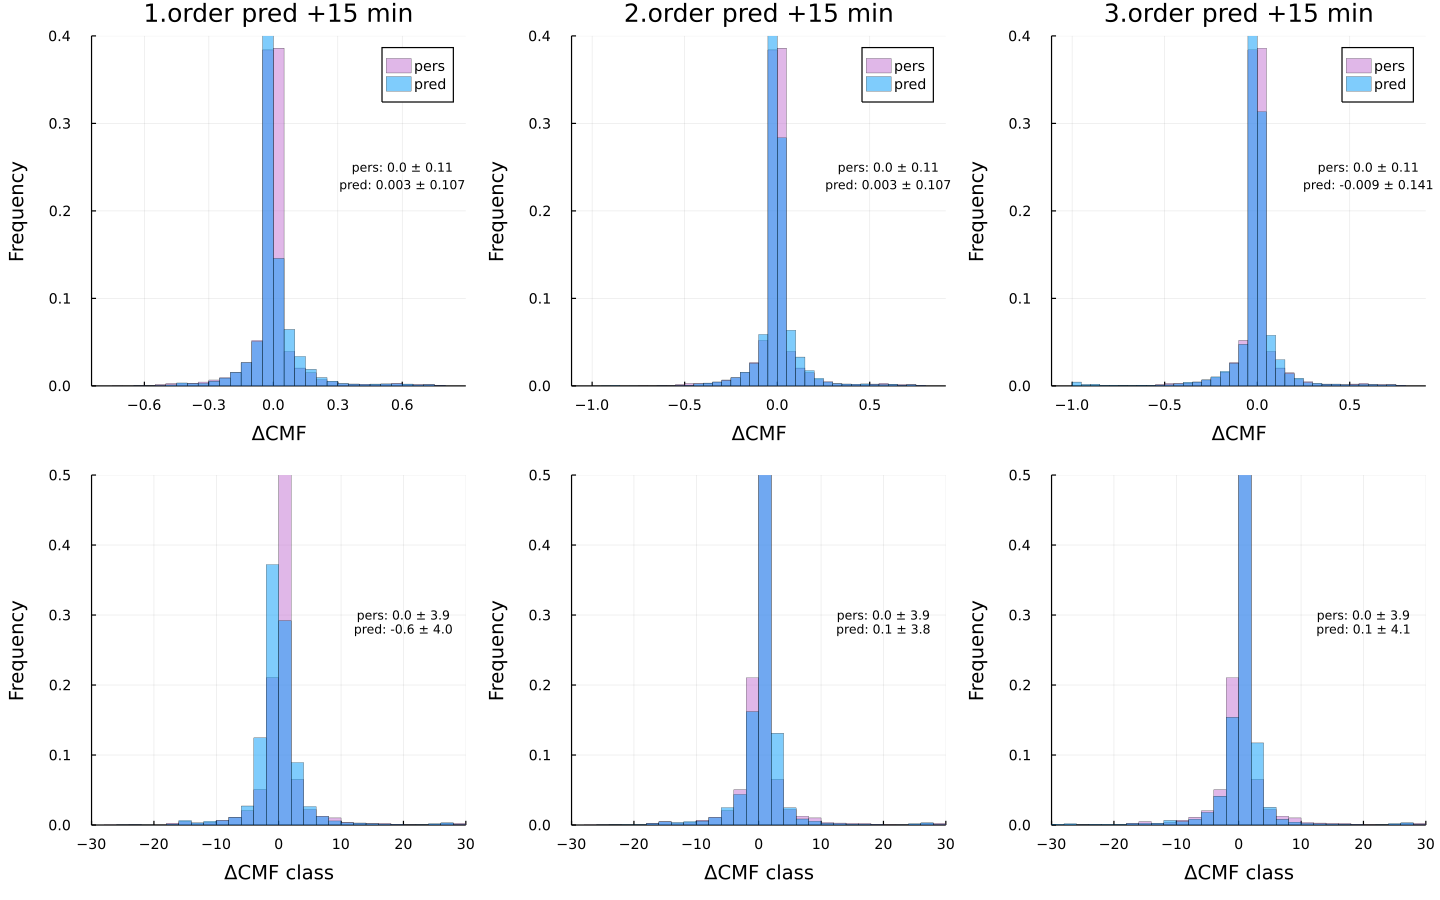

In [27]:
h_dif = plot(h1, h2, h3, h11, h12, h13, layout=@layout([a b c; d e f]), dpi=:120, size=(1200, 750), 
        left_margin=20px, bottom_margin=20px, fmt=:png)

In [5]:
od, n = 2, 30
mae1, rmse1 = mae_rmse(getDF(od, 1, n); tit="Athens $(od).order +$(15*1) min")
mae2, rmse2 = mae_rmse(getDF(od, 2, n); tit="+$(15*2) min")
mae3, rmse3 = mae_rmse(getDF(od, 3, n); tit="+$(15*3) min")
mae4, rmse4 = mae_rmse(getDF(od, 4, n); tit="+$(15*4) min");

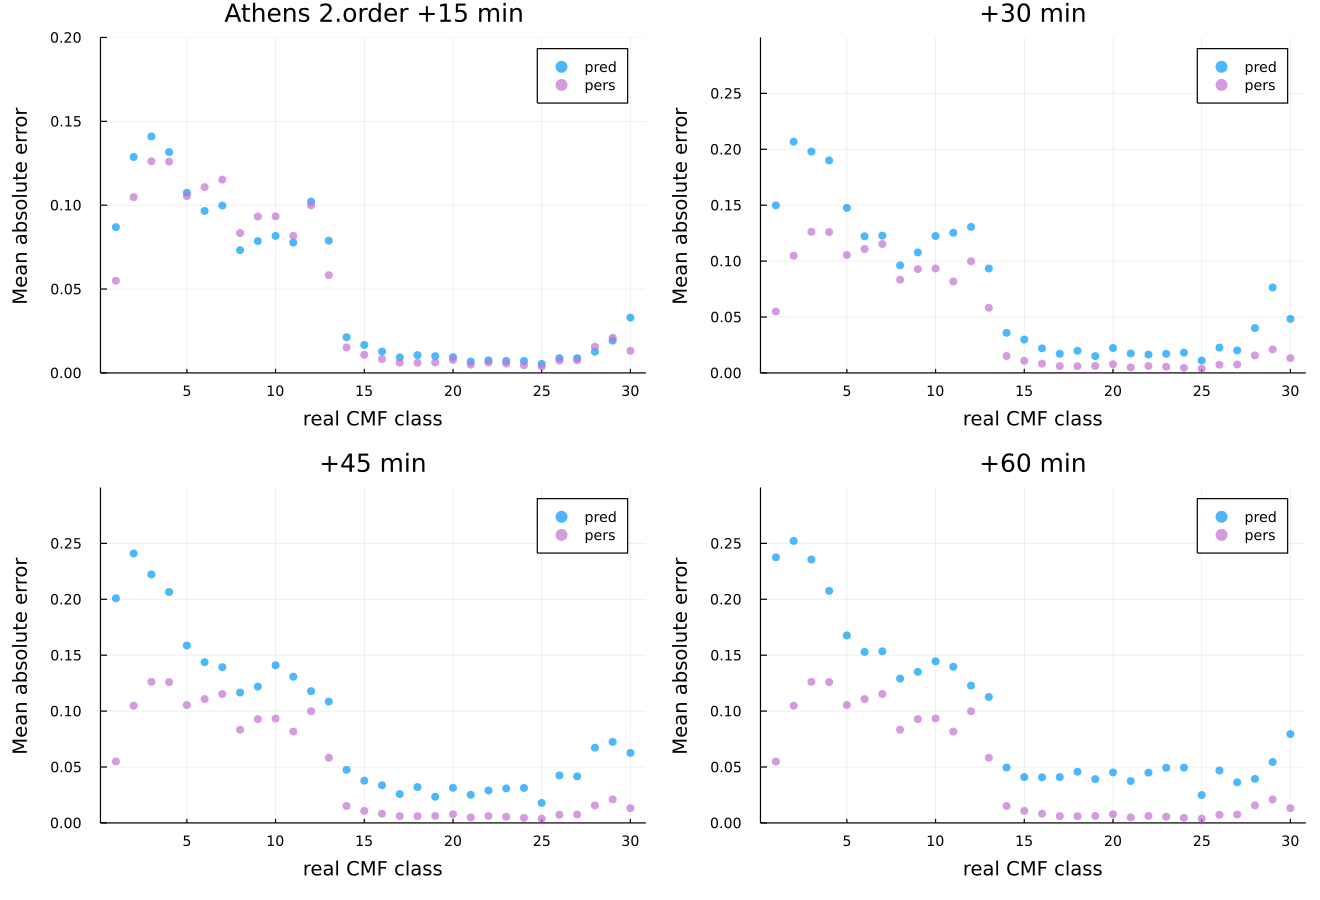

In [6]:
maes = plot(mae1, mae2, mae3, mae4, layout=@layout([a b; c d]), dpi=:120, size=(1100, 750), 
        left_margin=20px, bottom_margin=20px, fmt=:png)

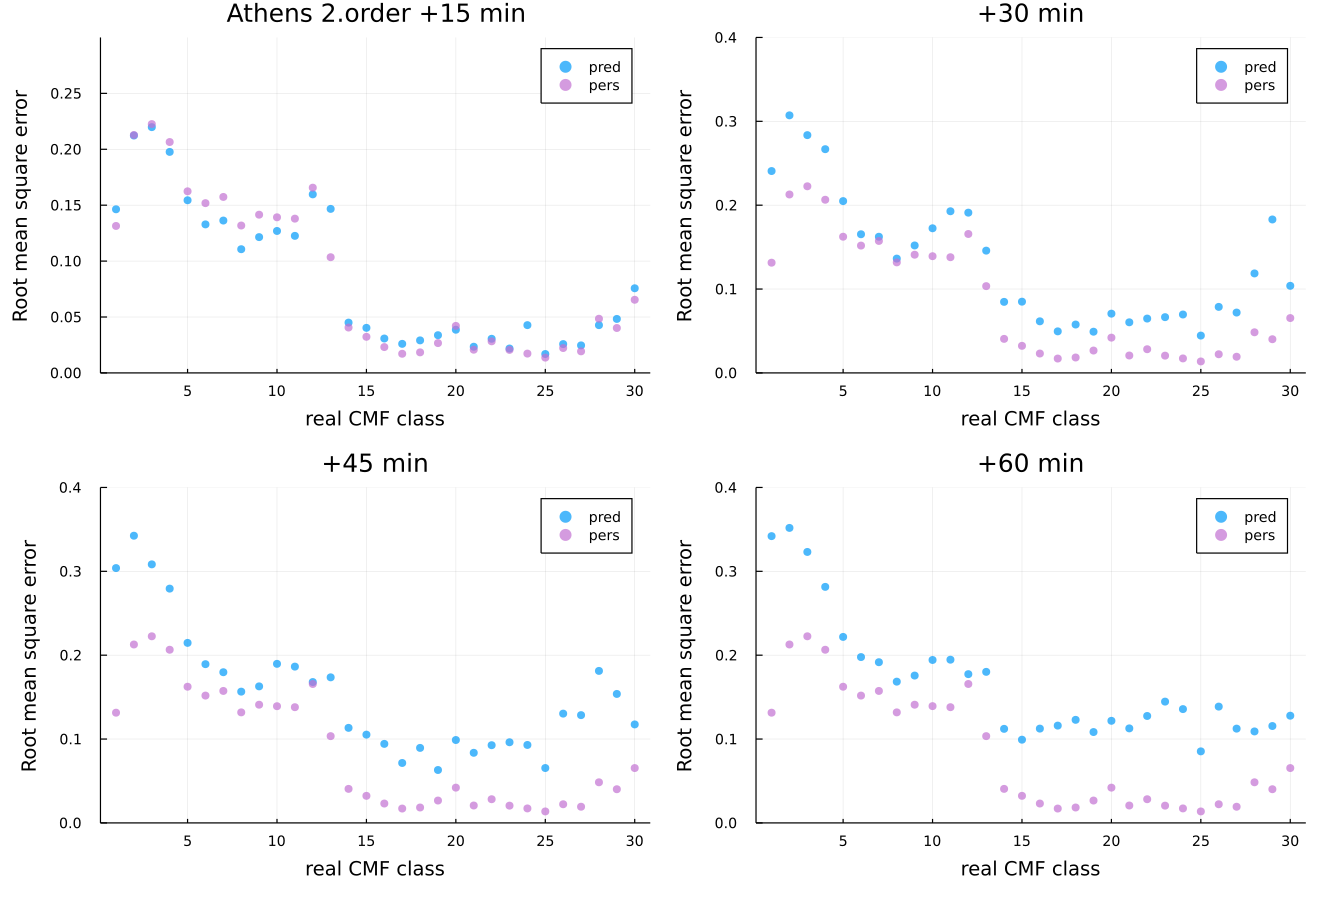

In [7]:
rmses = plot(rmse1, rmse2, rmse3, rmse4, layout=@layout([a b; c d]), dpi=:120, size=(1100, 750), 
        left_margin=20px, bottom_margin=20px, fmt=:png)

In [19]:
ticks = rd.(binMean, 2)[[1:2:15;29]]

9-element Vector{Float64}:
 0.19
 0.32
 0.43
 0.59
 0.71
 0.81
 0.9
 0.93
 0.99

In [20]:
h_train = histogram(data_train, bins=binStarts, xticks=ticks, ylabel="Counts",
    title="Athens train (2004_02-2018_12)")

h_test = histogram(data_test, bins=binStarts, xticks=ticks, 
    title="test (2019)");

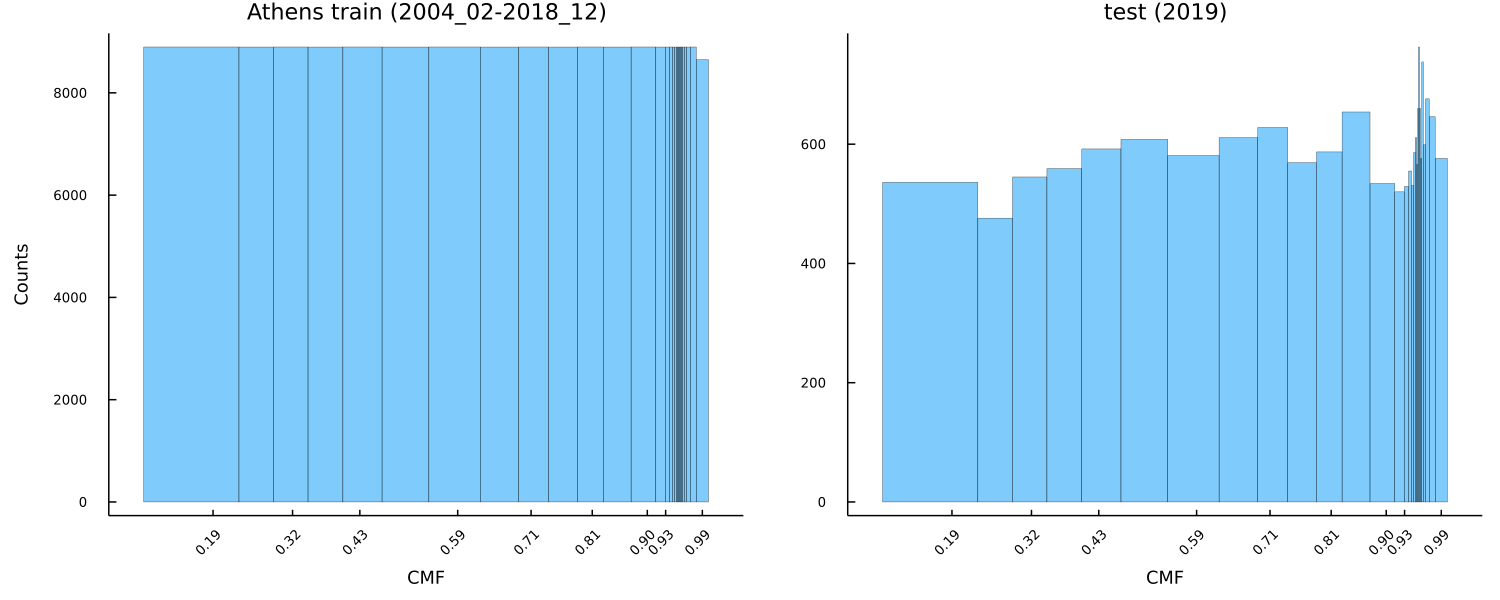

In [21]:
l = @layout [a b]
h_ep = plot(h_train, h_test, layout=l, leg=false, grid=false, xlabel="CMF", 
    lw=0.2, fillalpha=0.5, labelfontsize=8, titlefontsize=10, tickfontsize=6, xrotation=45,
    leftmargin=20px, bottommargin=20px, dpi=150, fmt=:png, size=(1000,400))

In [13]:
describe(df11.pred_cls)

Summary Stats:
Length:         17937
Missing Count:  0
Mean:           14.893126
Minimum:        2.000000
1st Quartile:   8.000000
Median:         14.000000
3rd Quartile:   21.000000
Maximum:        29.000000
Type:           Int64


In [23]:
df11 = getDF(1, 1, N)

df12 = getDF(1, 2, N)

df13 = getDF(1, 3, N)
df14 = getDF(1, 4, N);

In [24]:
df21 = getDF(2, 1, N)

df22 = getDF(2, 2, N)
df23 = getDF(2, 3, N)
df24 = getDF(2, 4, N);

17933×14 DataFrame
   Row │ real      real_cls  pers      pers_cls  dif_pers     dif_cls_pers  pred      pred_cls  dif_pred     dif_cls_pred  pred_n    pred_cls_n  dif_pred_n   dif_cls_pred_n 
       │ Float64   Int64     Float64   Int64     Float64      Int64         Float64   Int64     Float64      Int64         Float64   Int64       Float64      Int64          
───────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
     1 │ 0.303627         3  0.389299         4   0.0856718              1  0.49599          6   0.192364               3  0.599816           7   0.29619                  4
     2 │ 0.191245         1  0.725234         9   0.533989               8  0.735315         9   0.54407                8  0.717158           9   0.525913                 8
     3 │ 0.306435         3  0.841421        12   0.534986               9  0.842306        12   0.535871               9  0.833206          12   0.526771                 9
     4 │ 0.288095         2  0.77269         10   0.484595               8  0.737132         9   0.449037               7  0.717158           9   0.429063                 7
     5 │ 0.256549         2  0.303627         3   0.0470778              1  0.334387         3   0.0778377              1  0.564615           7   0.308066                 5
     6 │ 0.229625         1  0.191245         1  -0.0383795              0  0.267708         2   0.0380835              1  0.522433           6   0.292808                 5
     7 │ 0.22068          1  0.306435         3   0.0857549              2  0.361413         4   0.140733               3  0.611719           7   0.391039                 6
     8 │ 0.18659          1  0.288095         2   0.101505               1  0.316244         3   0.129654               2  0.553984           7   0.367394                 6
     9 │ 0.217646         1  0.256549         2   0.038903               1  0.310751         3   0.0931052              2  0.553984           7   0.336338                 6
    10 │ 0.25662          2  0.229625         1  -0.026995              -1  0.241461         2  -0.0151584              0  0.522433           6   0.265813                 4
    11 │ 0.215674         1  0.22068          1   0.00500563             0  0.226633         1   0.0109585              0  0.226633           1   0.0109585                0
   ⋮   │    ⋮         ⋮         ⋮         ⋮           ⋮            ⋮           ⋮         ⋮           ⋮            ⋮           ⋮          ⋮            ⋮             ⋮
 17924 │ 0.550436         7  0.356983         4  -0.193453              -3  0.495484         6  -0.0549516             -1  0.599816           7   0.0493806                0
 17925 │ 0.557637         7  0.366657         4  -0.19098               -3  0.426907         5  -0.13073               -2  0.611719           7   0.0540823                0
 17926 │ 0.621381         7  0.40426          5  -0.217121              -2  0.522433         6  -0.0989484             -1  0.599816           7  -0.0215646                0
 17927 │ 0.698062         9  0.441669         5  -0.256392              -4  0.475439         6  -0.222623              -3  0.599816           7  -0.0982454               -2
 17928 │ 0.632632         8  0.550436         7  -0.0821963             -1  0.621859         7  -0.0107735             -1  0.599816           7  -0.0328157               -1
 17929 │ 0.605522         7  0.557637         7  -0.0478845              0  0.599816         7  -0.00570525             0  0.599816           7  -0.00570525               0
 17930 │ 0.877365        13  0.621381         7  -0.255984              -6  0.599816         7  -0.277549              -6  0.599816           7  -0.277549                -6
 17931 │ 0.898045        13  0.698062         9  -0.199983              -4  0.73197          9  -0.166075              -4  0.717158           9  -0.180887                -4
 17932

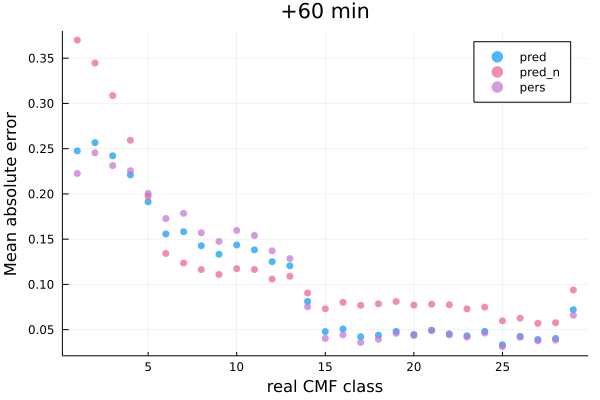

In [25]:
mae11 = mae_rmse(df11, tit="Athens 1.order +15 min")[1]

mae12 = viz_err(df12, "+30 min")

mae13 = viz_err(df13, "+45 min")
mae14 = viz_err(df14, "+60 min")

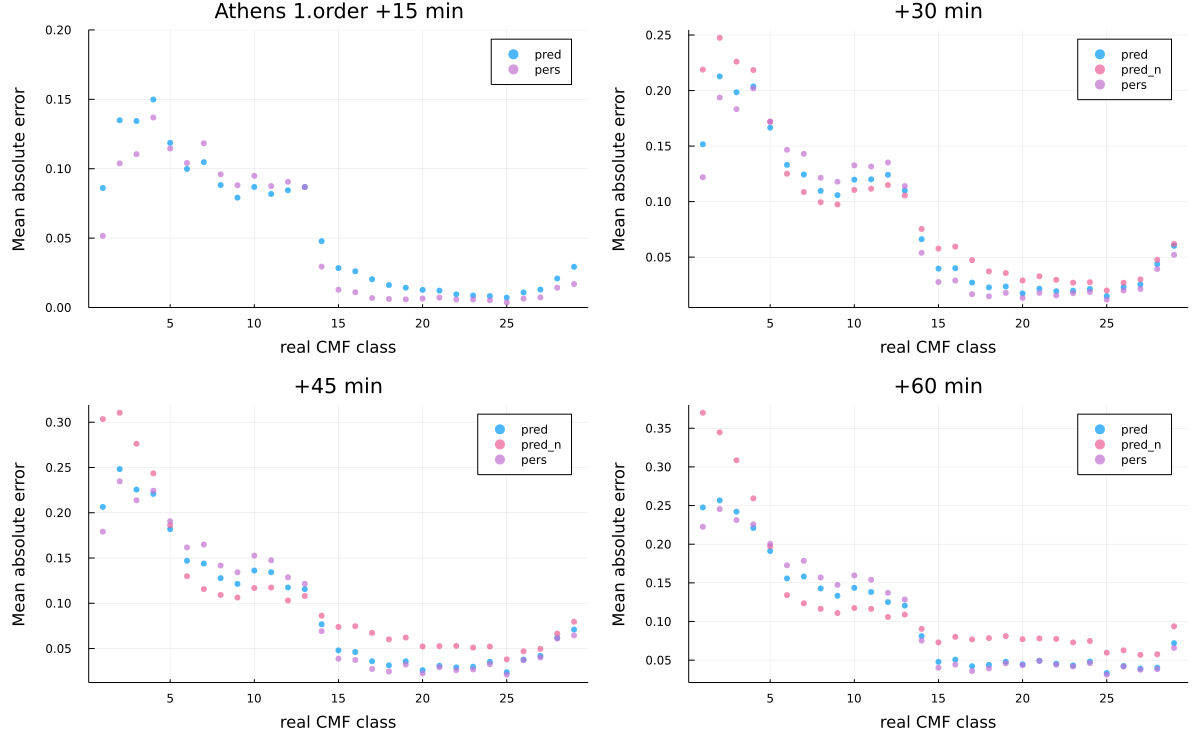

In [26]:
mae1 = plot(mae11, mae12, mae13, mae14, layout=@layout([a b; c d]), size=(1200, 750), #dpi=150, #ylim=(0, 0.35),
    left_margin=25px, bottom_margin=25px, fmt=:png)

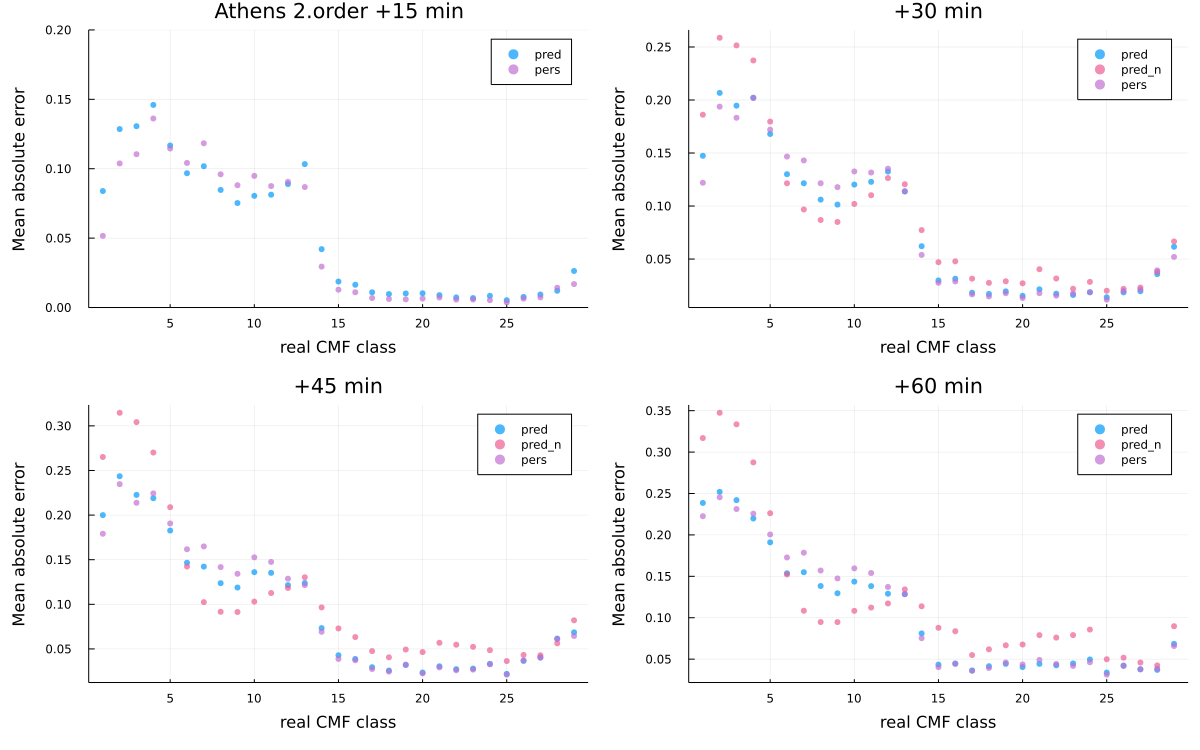

In [27]:
mae21 = mae_rmse(df21, tit="Athens 2.order +15 min")[1]

mae22 = viz_err(df22, "+30 min")
mae23 = viz_err(df23, "+45 min")
mae24 = viz_err(df24, "+60 min")

mae2 = plot(mae21, mae22, mae23, mae24, layout=@layout([a b; c d]), size=(1200, 750), # dpi=150, #ylim=(0, 0.35),
    left_margin=25px, bottom_margin=25px, fmt=:png)

In [30]:
ticks = string.(rd.(binMean, 2))

30-element Vector{String}:
 "0.19"
 "0.26"
 "0.32"
 "0.37"
 "0.43"
 "0.5"
 "0.59"
 "0.66"
 "0.71"
 "0.76"
 "0.81"
 "0.85"
 "0.9"
 ⋮
 "0.95"
 "0.95"
 "0.95"
 "0.95"
 "0.96"
 "0.96"
 "0.96"
 "0.96"
 "0.97"
 "0.97"
 "0.99"
 "1.0"

In [32]:
b11 = viz_box(df11, 1, "1.order t+$(15*1) min")

b12 = viz_box(df12, 2, "t+$(15*2) min")
b13 = viz_box(df13, 3, "t+$(15*3) min")
b14 = viz_box(df14, 4, "t+$(15*4) min")

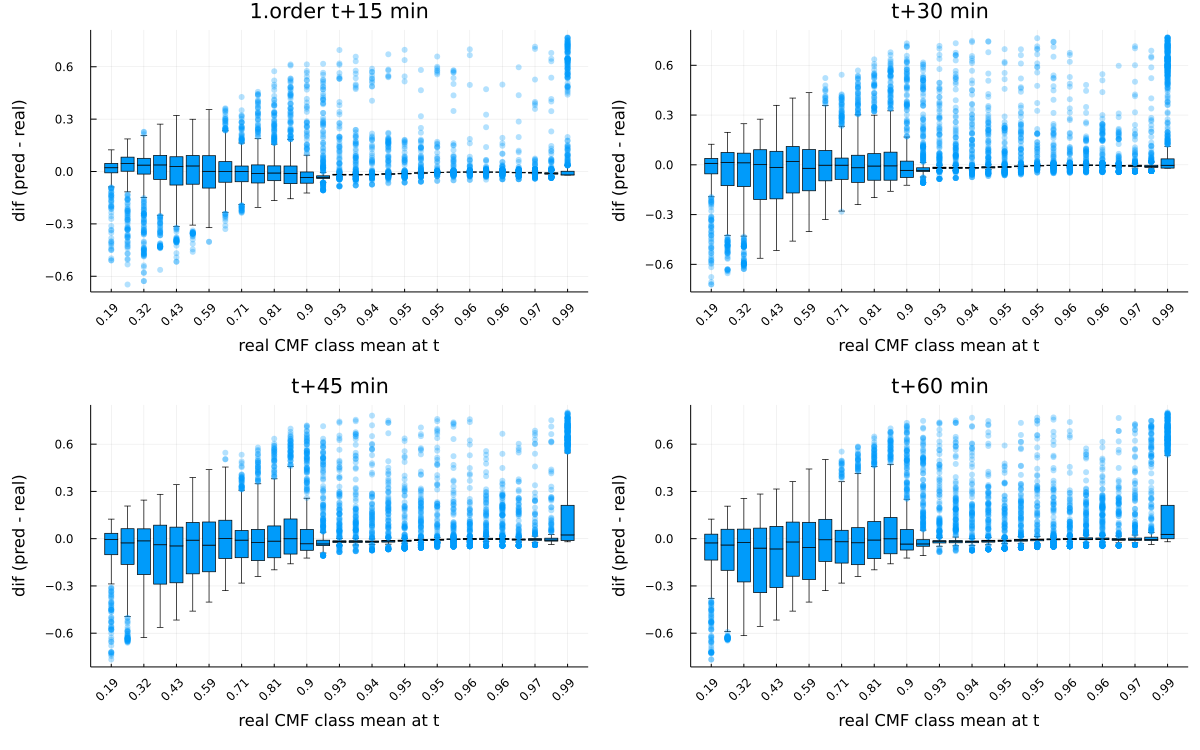

In [33]:
boxes1 = plot(b11, b12, b13, b14, layout=@layout([a b; c d]), size=(1200, 750), 
    left_margin=25px, bottom_margin=25px, fmt=:png)

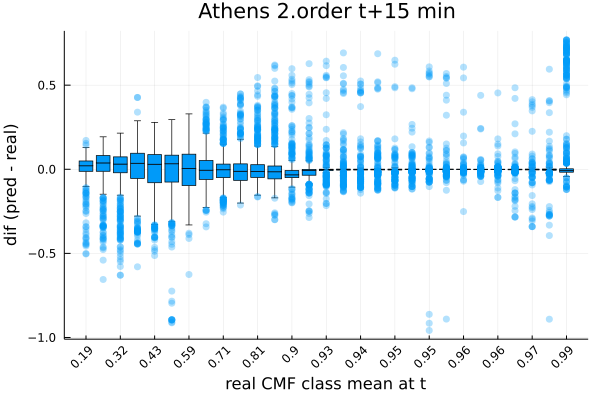

In [35]:
b21 = viz_box(df21, 1, "Athens 2.order t+$(15*1) min")

In [34]:
b22 = viz_box(df22, 2, "t+$(15*2) min")
b23 = viz_box(df23, 3, "t+$(15*3) min")
b24 = viz_box(df24, 4, "t+$(15*4) min");

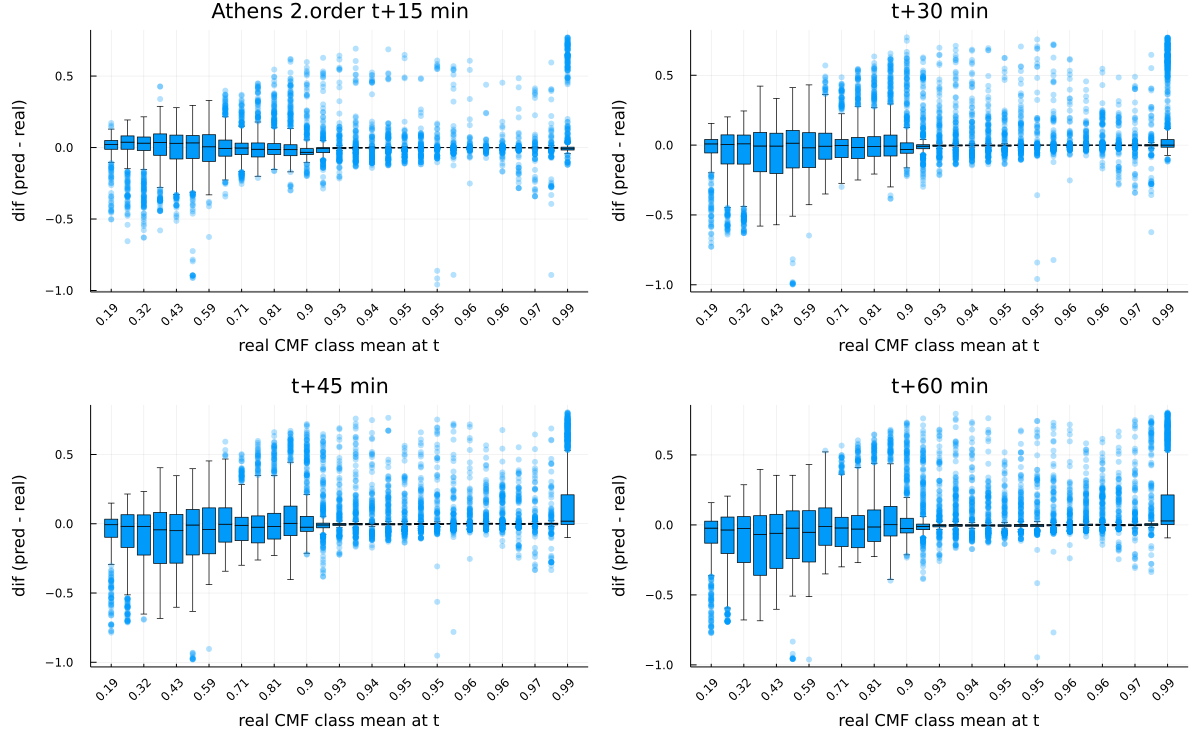

In [36]:
boxes2 = plot(b21, b22, b23, b24, layout=@layout([a b; c d]), size=(1200, 750), 
    left_margin=25px, bottom_margin=25px, fmt=:png)

### mn ± sd 

In [17]:
# apply time steps
aplTs(df, func) = combine(df, :dif_pers => func => :pers, :dif_neib => func => :neib, :dif_pred => func => :pred, 
    :dif_hyb_r => func => :hyb_r, :dif_hyb_m => func => :hyb_m);

In [33]:
col1 = combine(df2t, :dif_pred_n => mean => :pred_n)
append!(col1, combine(df3t, :dif_pred_n => mean => :pred_n))
append!(col1, combine(df4t, :dif_pred_n => mean => :pred_n))

col2 = reshape([NaN; Array(col1)], 4);

mns = aplTs(df1t, mean)
append!(mns, aplTs(df2t, mean))
append!(mns, aplTs(df3t, mean))
append!(mns, aplTs(df4t, mean));

insertcols!(mns, 4, :pred_n => col2)

In [18]:
sds = aplTs(df1t, std)
append!(sds, aplTs(df2t, std))
append!(sds, aplTs(df3t, std))
append!(sds, aplTs(df4t, std));

col3 = combine(df2t, :dif_pred_n => std => :pred_n)
append!(col3, combine(df3t, :dif_pred_n => std => :pred_n))
append!(col3, combine(df4t, :dif_pred_n => std => :pred_n))

col4 = reshape([NaN; Array(col3)], 4);

insertcols!(sds, 4, :pred_n => col4)

4×6 DataFrame
 Row │ pers       neib      pred       pred_n      hyb_r      hyb_m     
     │ Float64    Float64   Float64    Float64     Float64    Float64   
─────┼──────────────────────────────────────────────────────────────────
   1 │ 0.0974596  0.136179  0.0965157  NaN         0.0955496  0.0961825
   2 │ 0.137875   0.163108  0.131319     0.139645  0.132344   0.130136
   3 │ 0.156574   0.174254  0.149177     0.160809  0.1539     0.146157
   4 │ 0.16992    0.183489  0.161195     0.174927  0.16195    0.155615

In [43]:
gb1 = groupedbar(Matrix(mns), leg=:none, 
    c=[4 5 1 7 2 6], ylabel="Bias mean")

gb2 = groupedbar(Matrix(sds), leg=:topleft, label=["pers" "neib" "pred_a" "pred_b" "hyb_r" "hyb_m"],
    c=[4 5 1 7 2 6],
    ylim=(0, 0.2), ylabel="Bias standard deviation");

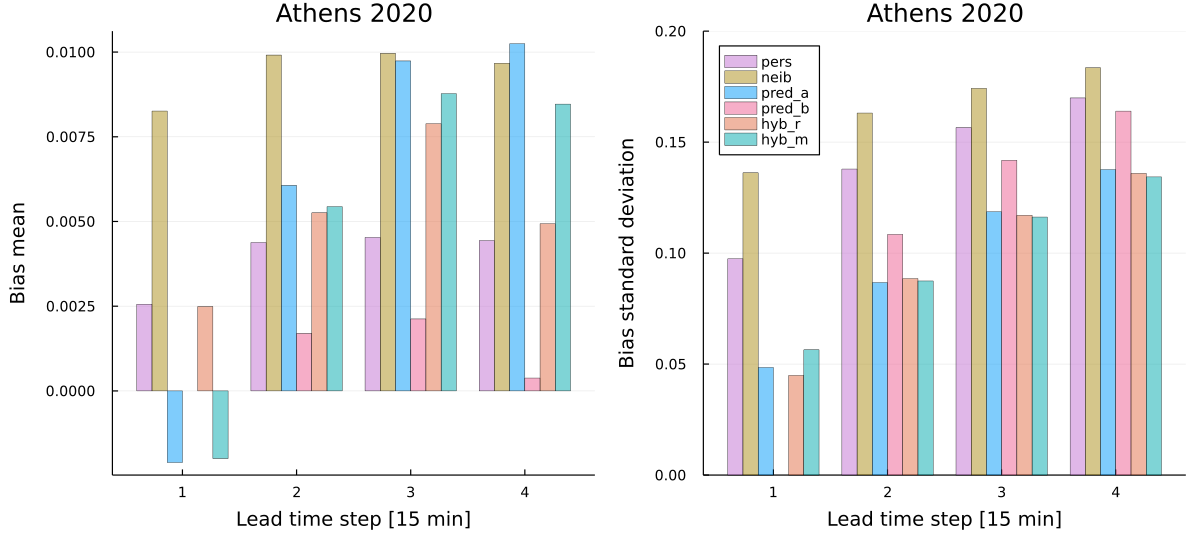

In [44]:
gbs = plot(gb1, gb2, layout=@layout([a b]), lw=0.3, fillalpha=0.5, grid=:y,
    xlabel="Lead time step [15 min]", title="Athens 2020",
    leftmargin=20px, bottommargin=20px, size=(1000, 450))

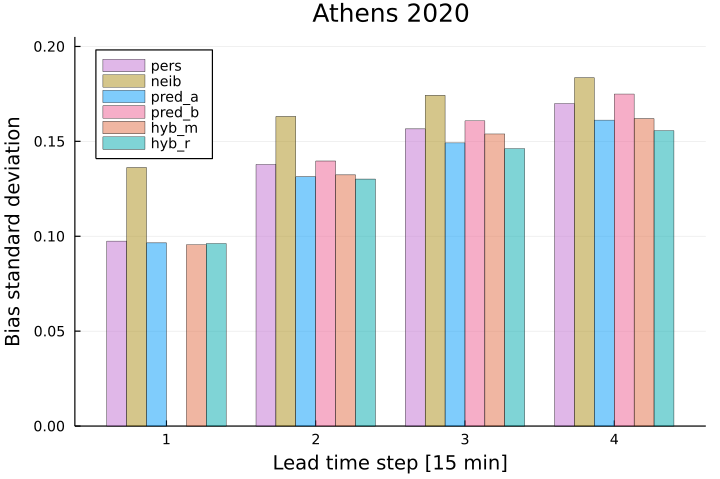

In [19]:
# new
gb_at = groupedbar(Matrix(sds), leg=:topleft, label=["pers" "neib" "pred_a" "pred_b" "hyb_m" "hyb_r"],
    c=[4 5 1 7 2 6], lw=0.3, fillalpha=0.5, grid=:y, 
    ylim=(0, 0.205), xlabel="Lead time step [15 min]", ylabel="Bias standard deviation", title=tit)

### rmse vs mae

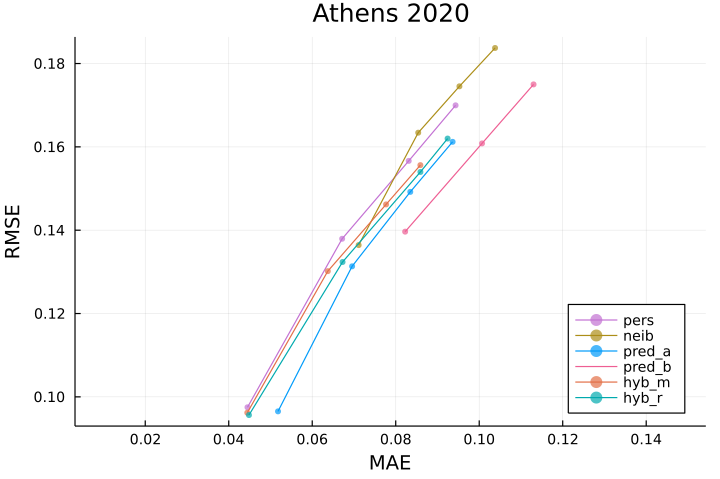

In [20]:
errs_at = mae_vs_rmse(df1t, df2t, df3t, df4t; tit=tit)

df_err = 6×9 DataFrame
 Row │ method  mae1         mae2       mae3       mae4       rmse1        rmse2      rmse3     rmse4
     │ String  Float64      Float64    Float64    Float64    Float64      Float64    Float64   Float64
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ pers      0.0444944  0.0671722  0.0831133  0.094336     0.0974915  0.137943   0.156631  0.169969
   2 │ neib      0.0711223  0.0853934  0.0952542  0.103791     0.136423   0.163404   0.174528  0.183733
   3 │ pred_a    0.0278391  0.0467819  0.0631778  0.0771182    0.0485404  0.0869463  0.119028  0.138008
   4 │ pred_b  NaN          0.0645398  0.0870946  0.103892   NaN          0.108447   0.141834  0.163969
   5 │ hyb_m     0.0244403  0.0471371  0.0621365  0.0748111    0.0564738  0.0876218  0.116575  0.134593
   6 │ hyb_r     0.0256554  0.0477541  0.0630764  0.0775892    0.0449673  0.0886805  0.117319  0.13604


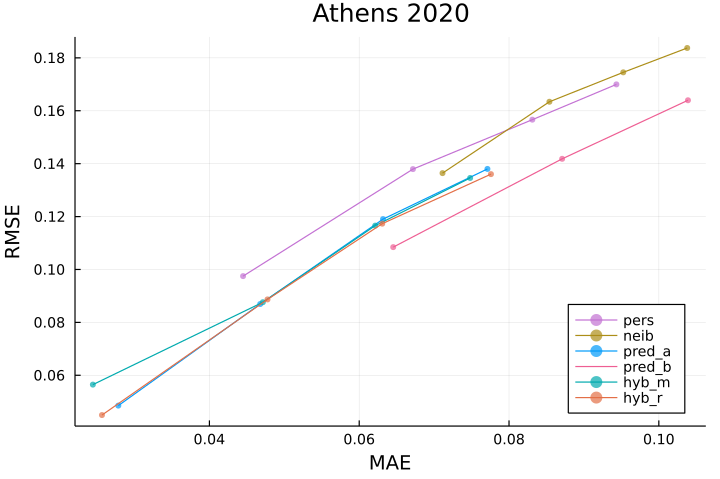

In [47]:
errs_at = mae_vs_rmse(df1t, df2t, df3t, df4t; tit=city*" 2020")

### First order difference

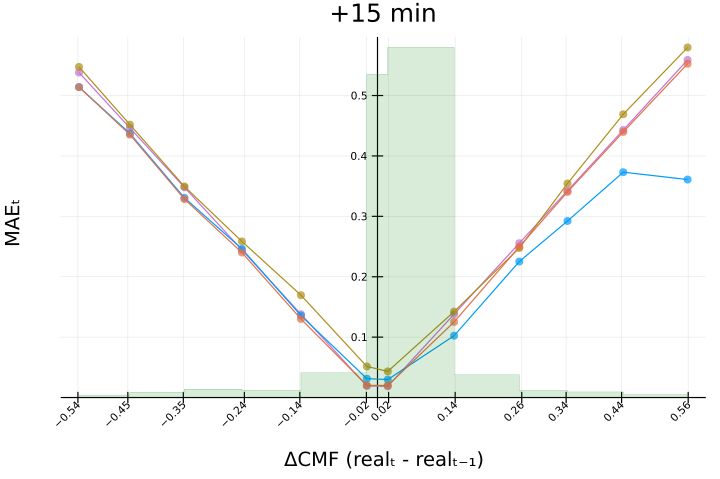

In [25]:
dif1 = viz_dif(df1t, 1)

In [26]:
dif2 = viz_dif(df2t, 2)
dif3 = viz_dif(df3t, 3)
dif4 = viz_dif(df4t, 4);

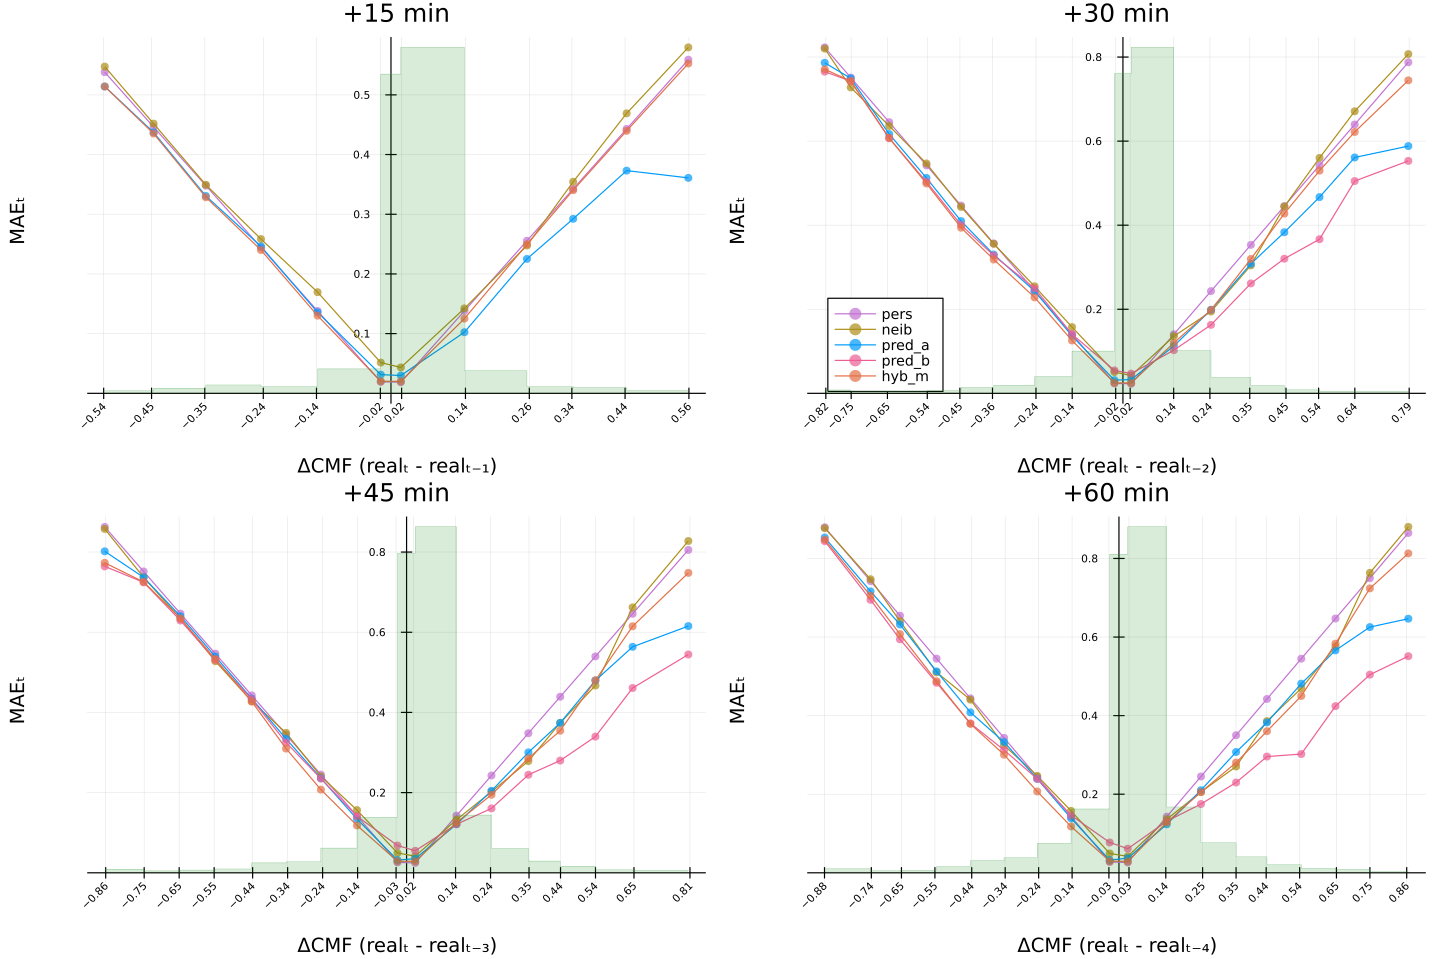

In [27]:
difs = plot(dif1, dif2, dif3, dif4, layout=@layout([a b; c d]), size=(1200, 800), 
    leftmargin=20px, ylabel="MAEₜ")

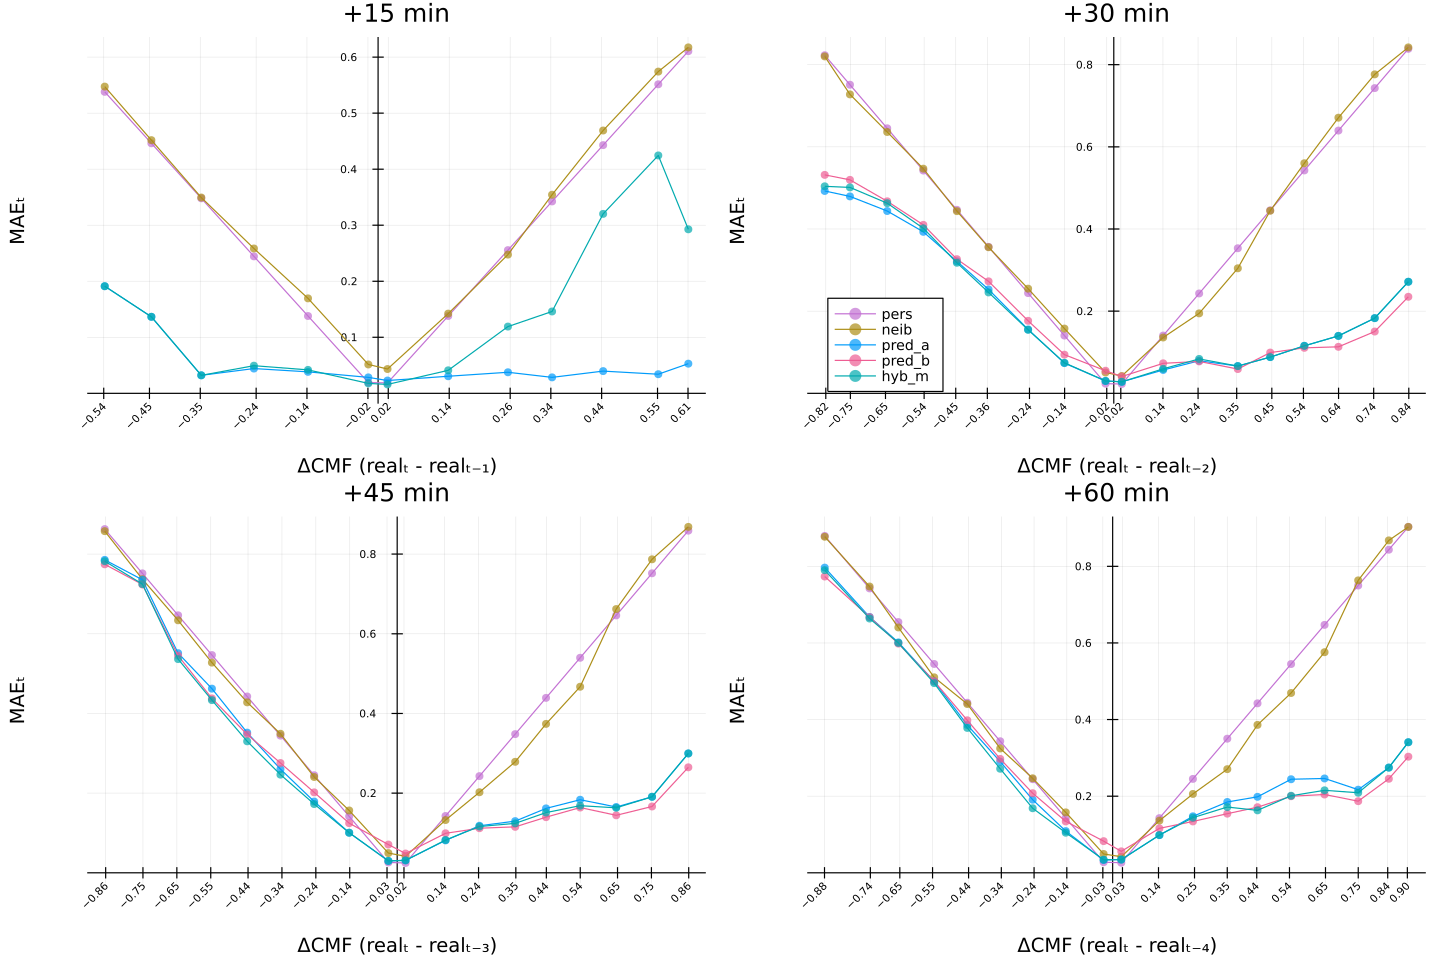

In [52]:
difs = plot(dif1, dif2, dif3, dif4, layout=@layout([a b; c d]), size=(1200, 800), #ylim=(0, 1.01), 
    leftmargin=20px, ylabel="MAEₜ")

### Monthly avg

In [25]:
gbb = groupby(df1t, :month)
ghi_mo = [mean(g.ghi) for g in gbb]
cmf_mo = [mean(g.real) for g in gbb];

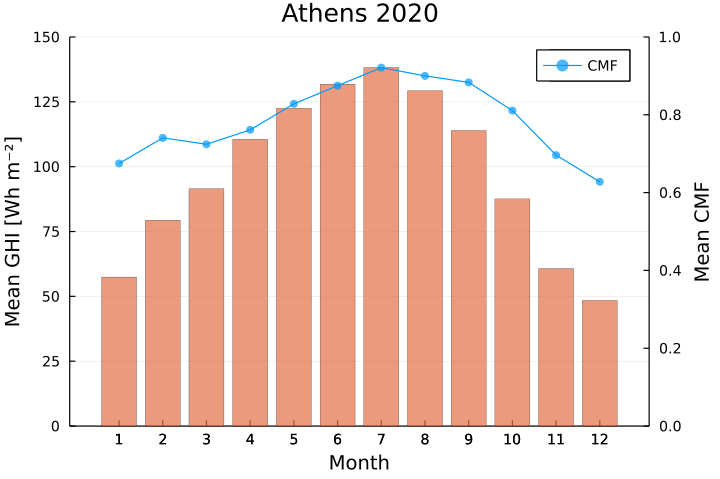

In [17]:
bar(ghi_mo, c=2, lw=0.2, fillalpha=0.7, grid=:y, right_margin=1.3cm,
    xtick=1:12, ytick=0:25:150, ylim=(0,150), 
    xlabel="Month", ylabel="Mean GHI [Wh m⁻²]", title=tit)
plot!(twinx(), cmf_mo, marker=(0.7, stroke(0)), 
    xtick=1:12, ylim=(0,1), label="CMF", ylabel="Mean CMF") 

### GHI evaluation

In [26]:
df1g = getGHI(df1t, 1)

df2g = getGHI(df2t, 2)
df3g = getGHI(df3t, 3)
df4g = getGHI(df4t, 4);

#### MAE

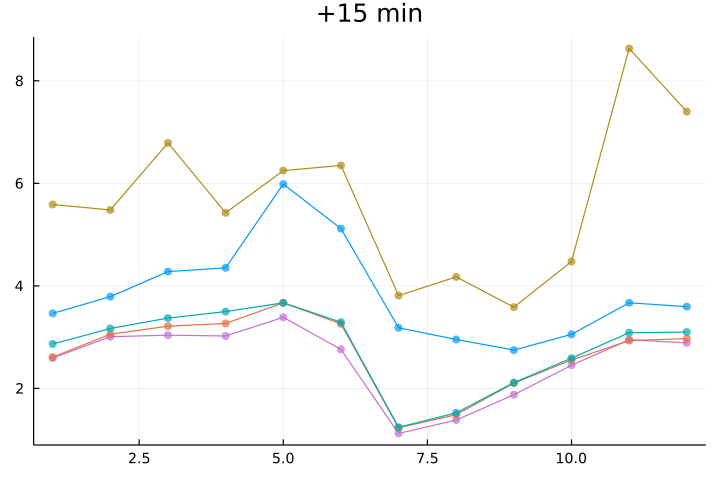

In [30]:
pg1 = viz_ghi_err(df1g, 1; tit="+$(15*1) min")

In [31]:
pg2 = viz_ghi_err(df2g, 2; tit="+$(15*2) min")
pg3 = viz_ghi_err(df3g, 3; tit="+$(15*3) min")

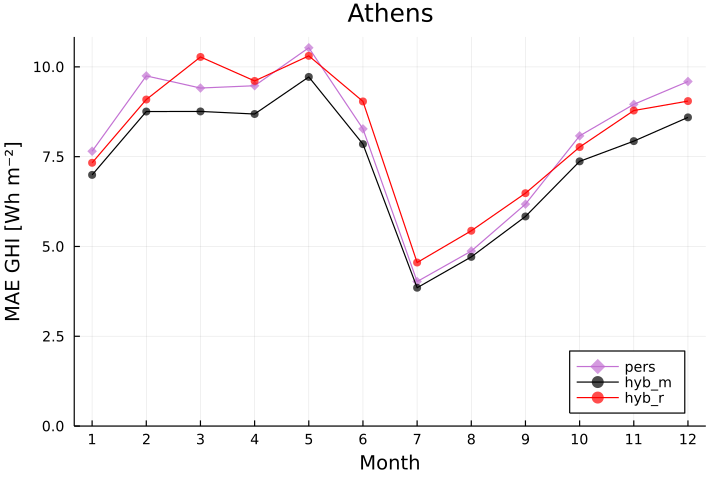

In [31]:
pg4 = viz_ghi_err(df4g, 4; tit=city)

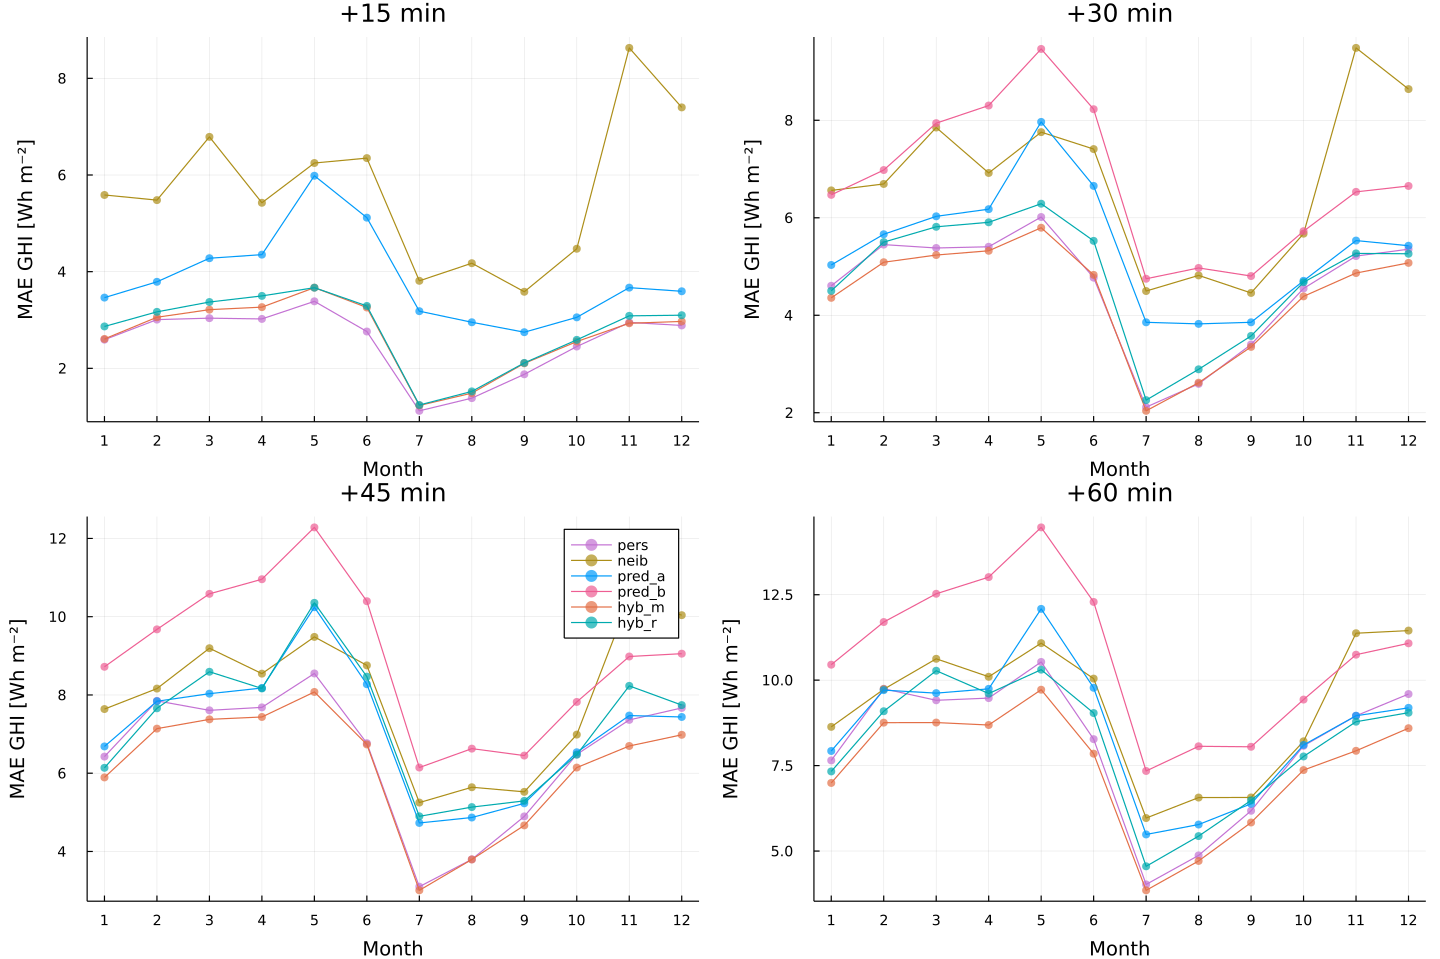

In [32]:
ps_ghi_mae = plot(pg1, pg2, pg3, pg4, layout=@layout([a b; c d]), leftmargin=20px, size=(1200, 800), 
    xtick=1:12, xlabel="Month", ylabel="MAE GHI [Wh m⁻²]")

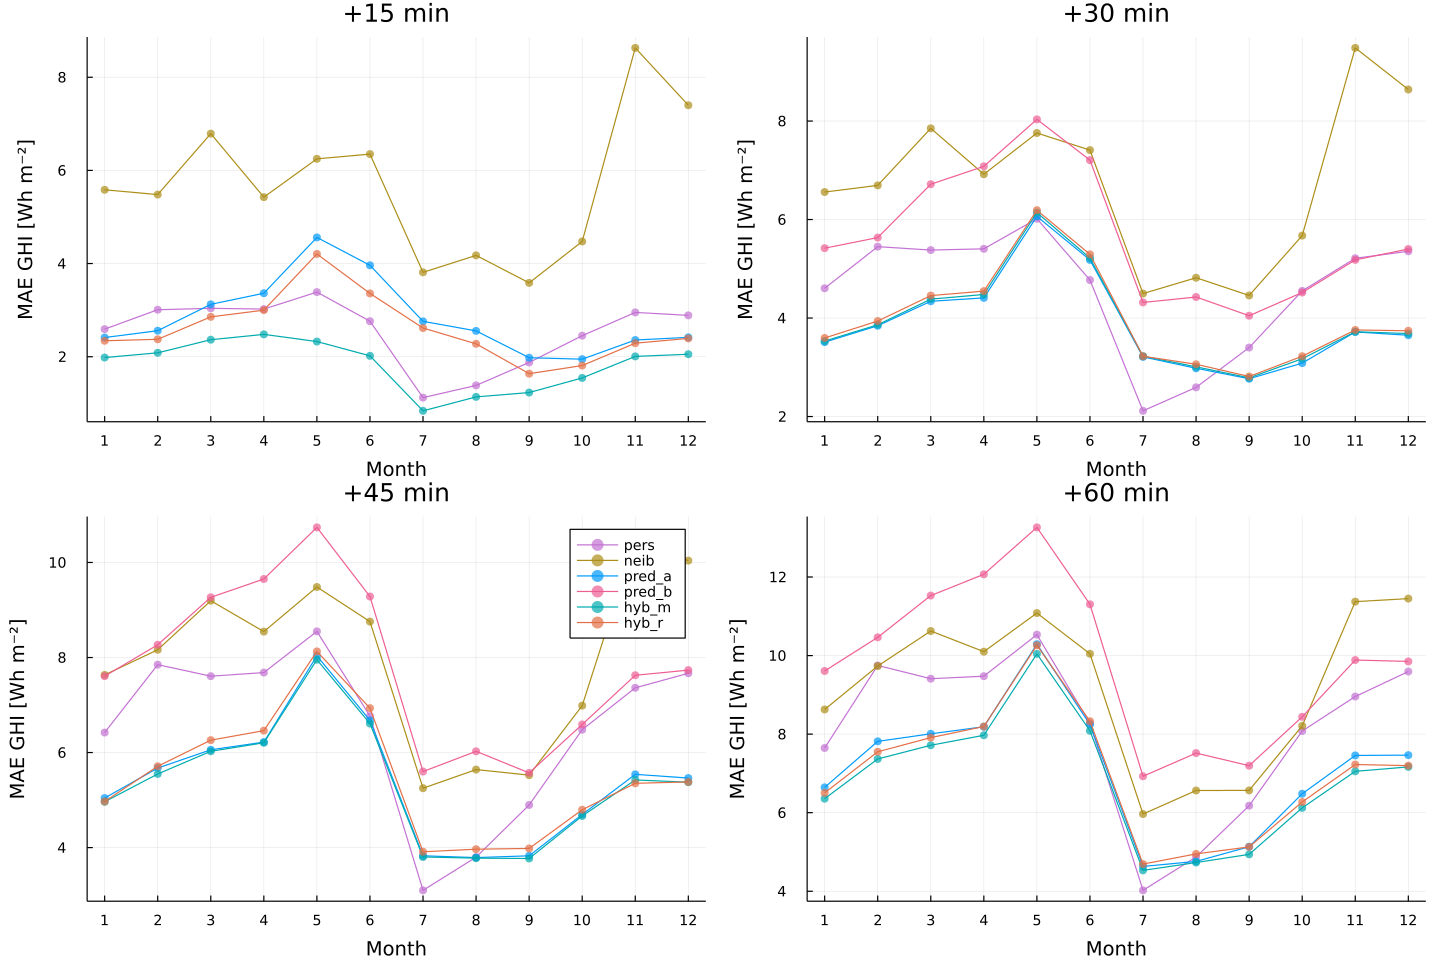

In [57]:
ps_ghi_mae = plot(pg1, pg2, pg3, pg4, layout=@layout([a b; c d]), leftmargin=20px, size=(1200, 800), 
    xtick=1:12, xlabel="Month", ylabel="MAE GHI [Wh m⁻²]")

#### RMSE

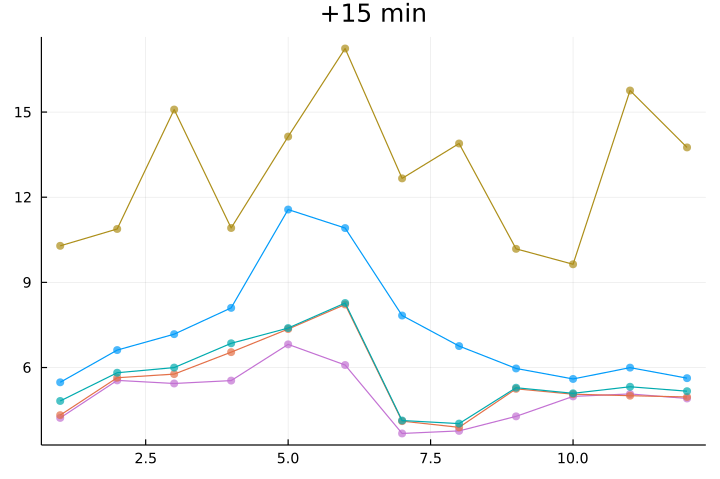

In [33]:
pgr1 = viz_ghi_err(df1g, 1; tit="+$(15*1) min", err="rmse")

In [34]:
pgr2 = viz_ghi_err(df2g, 2; tit="+$(15*2) min", err="rmse")
pgr3 = viz_ghi_err(df3g, 3; tit="+$(15*3) min", err="rmse")
pgr4 = viz_ghi_err(df4g, 4; tit="+$(15*4) min", err="rmse");

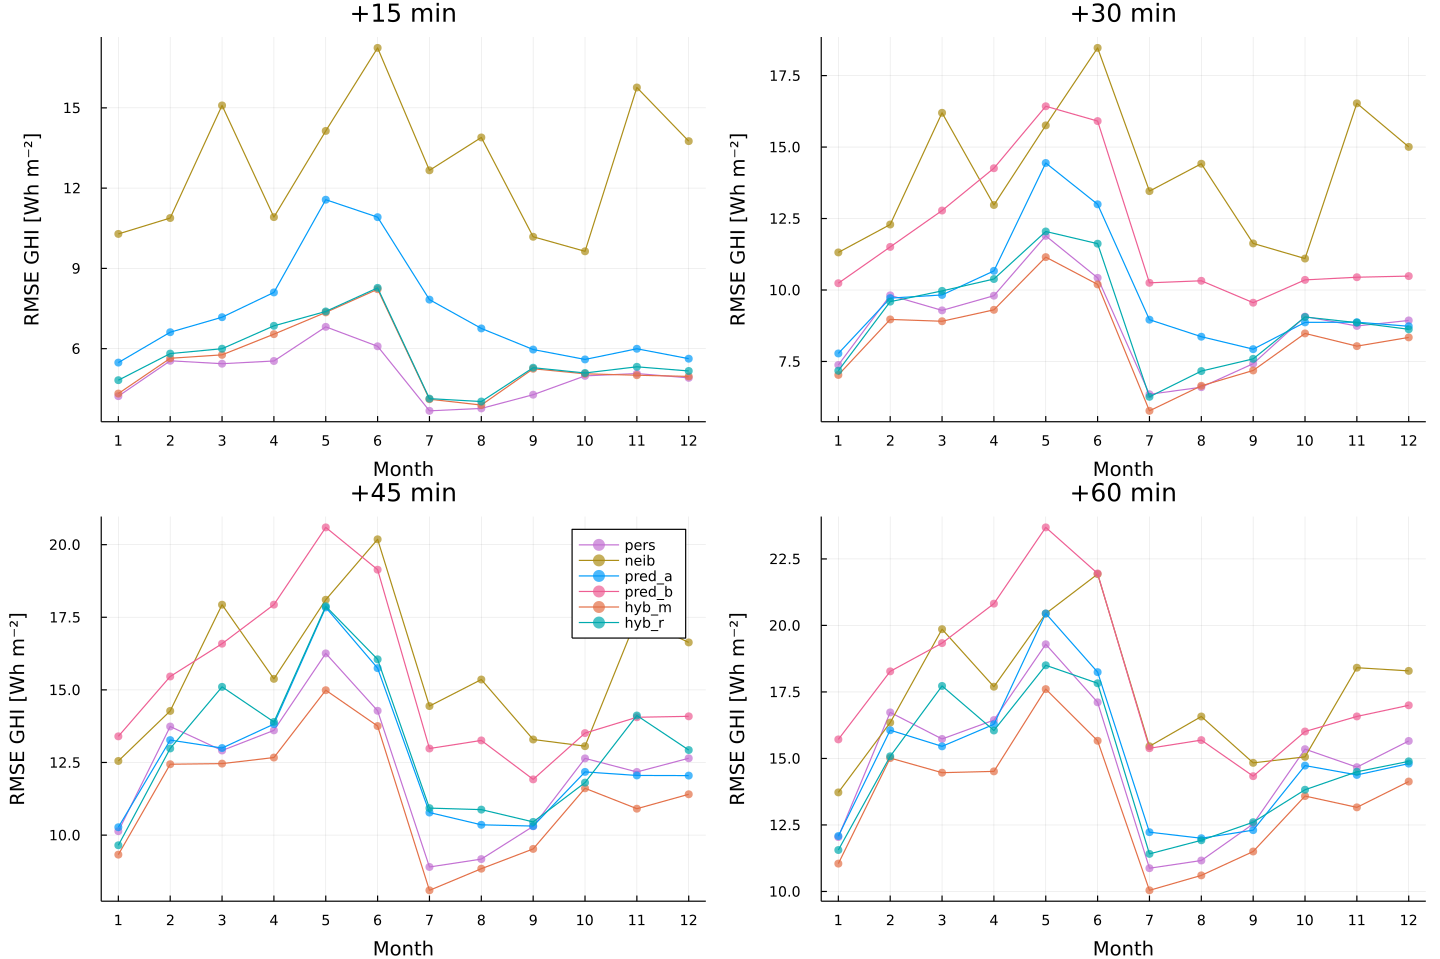

In [35]:
ps_ghi_rmse = plot(pgr1, pgr2, pgr3, pgr4, layout=@layout([a b; c d]), leftmargin=20px, size=(1200, 800), 
    xtick=1:12, xlabel="Month", ylabel="RMSE GHI [Wh m⁻²]")

In [43]:
gb

GroupedDataFrame with 12 groups based on key: month
First Group (1196 rows): month = 1
  Row │ time                 month  ghi         ghiCS      real      pers      neib      pred      real_cls  dif_pers     dif_neib     dif_pred      mae_min  hyb_m     rmse_min  hyb_r     dif_hyb_m  ⋯
      │ DateTime             Int8   Float64     Float64    Float64   Float64   Float64   Float64   Int64     Float64      Float64      Float64       Int64    Float64   Int64     Float64   Float64    ⋯
──────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
    1 │ 2020-01-01T06:30:00      1   13.3307     19.7287   0.675703  0.614652  0.791924  0.611719         8  -0.0610511    0.11622     -0.0639839          0  0.614652         0  0.614652  -0.0610511 ⋯
    2 │ 2020-01-01T06:45:00      1   16.9255     30.0285   0.563646  0.675703  0.748868  0.676321         7   0.112057     0.185222     0.112675           3  0.676321         3  0.676321   0.112675
    3 │ 2020-01-01T07:00:00      1   23.4972     40.4386   0.581057  0.563646  0.667907  0.590716         7  -0.0174108    0.0868501    0.00965896         3  0.590716         3  0.590716   0.0096589
    4 │ 2020-01-01T07:15:00      1   28.8591     50.6642   0.569616  0.581057  0.611277  0.599816         7   0.0114412    0.0416612    0.0302004          3  0.599816         3  0.599816   0.0302004
    5 │ 2020-01-01T07:30:00      1   36.6478     60.5389   0.605359  0.569616  0.595809  0.599816         7  -0.035743    -0.00955019  -0.00554262         3  0.599816         3  0.599816  -0.0055426 ⋯
    6 │ 2020-01-01T07:45:00      1   46.2966     69.9453   0.661898  0.605359  0.623387  0.599816         8  -0.056539    -0.0385112   -0.0620816          3  0.599816         3  0.599816  -0.0620816
    7 │ 2020-01-01T08:00:00      1   54.5623     78.7777   0.692611  0.661898  0.666933  0.676321         9  -0.0307131   -0.0256778   -0.01629            3  0.676321         3  0.676321  -0.01629
    8 │ 2020-01-01T08:15:00      1   49.9429     86.9628   0.574302  0.692611  0.577002  0.729917         7   0.118309     0.00270003   0.155615           3  0.729917         3  0.729917   0.155615
    9 │ 2020-01-01T08:30:00      1   40.0488     94.4736   0.423915  0.574302  0.44894   0.587904         5   0.150387     0.0250249    0.163989           3  0.587904         3  0.587904   0.163989  ⋯
   10 │ 2020-01-01T08:45:00      1   26.9798    101.226    0.266529  0.423915  0.369248  0.487133         2   0.157386     0.102719     0.220604           1  0.423915         3  0.487133   0.157386
   11 │ 2020-01-01T09:00:00      1   24.561     107.166    0.229187  0.266529  0.254415  0.360589         1   0.0373426    0.0252287    0.131403           1  0.266529         1  0.266529   0.0373426
  ⋮   │          ⋮             ⋮        ⋮           ⋮         ⋮         ⋮         ⋮         ⋮         ⋮           ⋮            ⋮            ⋮           ⋮        ⋮         ⋮         ⋮           ⋮     ⋱
 1186 │ 2020-01-31T13:15:00      1  101.075     106.381    0.95012   0.953098  0.953134  0.952088        20   0.00297811   0.00301346   0.00196808         1  0.953098         1  0.953098   0.0029781
 1187 │ 2020-01-31T13:30:00      1   91.8886     97.1186   0.946149  0.95012   0.950216  0.946773        18   0.00397142   0.00406768   0.00062427         1  0.95012          1  0.95012    0.0039714 ⋯
 1188 │ 2020-01-31T13:45:00      1   82.0568     87.1929   0.941095  0.946149  0.946286  0.940308        16   0.0050542    0.00519133  -0.000786615        1  0.946149         1  0.946149   0.0050542
 1189 │ 2020-01-31T14:00:00      1   71.6765     76.6829   0.934712  0.941095  0.941304  0.918173        15   0.00638215   0.00659182  -0.0165399          1  0.941095         1  0.941095   0.0063821
 1190 │ 2020-01-31T14:15:00      1   60.88       65.6873   0.926815  0.934712  0.934983  0.923432        14   0.00789698 

#### rel. impr

In [27]:
rDif1 = rDif(df1g)

rDif2 = rDif(df2g)
rDif3 = rDif(df3g)
rDif4 = rDif(df4g);

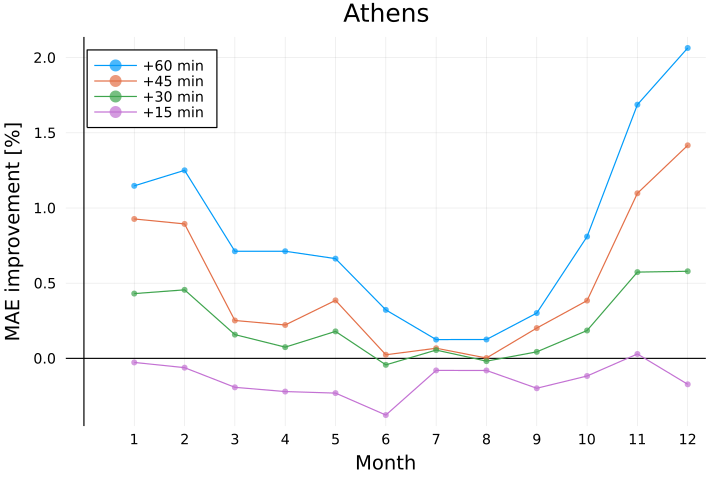

In [29]:
pRdif_m = plot([rDif4 rDif3 rDif2 rDif1], marker=(3, 0.7, stroke(0)), frame=:zerolines, 
    label=["+60 min" "+45 min" "+30 min" "+15 min"], leg=:topleft, 
    xticks=1:12, xlabel="Month", ylabel="MAE improvement [%]", title=city)

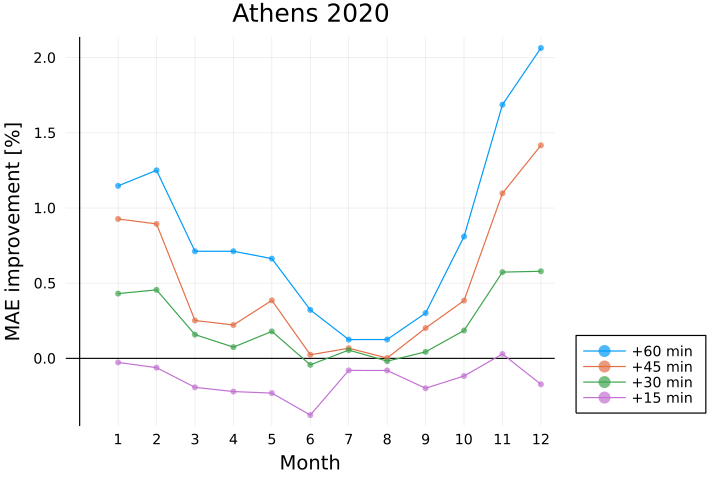

In [25]:
pRdif_m = plot([rDif4 rDif3 rDif2 rDif1], marker=(3, 0.7, stroke(0)), frame=:zerolines, 
    label=["+60 min" "+45 min" "+30 min" "+15 min"], leg=:outerbottomright, 
    xticks=1:12, xlabel="Month", ylabel="MAE improvement [%]", title=tit)

In [26]:
rDif1r = rDif(df1g; err="rmse")
rDif2r = rDif(df2g; err="rmse")
rDif3r = rDif(df3g; err="rmse")
rDif4r = rDif(df4g; err="rmse");

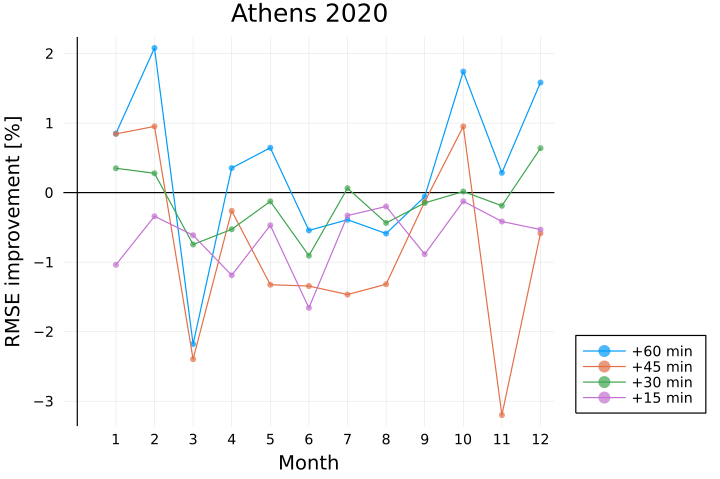

In [28]:
pRdif_r = plot([rDif4r rDif3r rDif2r rDif1r], marker=(3, 0.7, stroke(0)), frame=:zerolines, 
    label=["+60 min" "+45 min" "+30 min" "+15 min"], leg=:outerbottomright, 
    xticks=1:12, xlabel="Month", ylabel="RMSE improvement [%]", title=tit)